# Handling Outliers

An outlier is a value that deviates substantially from the rest of the data. That means it is an observation that is abnormally far apart from the other values.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_theme(rc={"figure.figsize":(4, 5)})     #width=4, height=5


## Automobile Dataset

In [2]:
# Defining the headers
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration", "num_doors", 
           "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height",
           "curb_weight", "engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", 
           "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,...,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,...,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,...,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,...,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,...,115.0,5500.0,18,22,17450.0


## Boxplots and Interquartile Range (IQR)

Graphing features are good ways for detecting outliers. Box plots are good examples. 

In [4]:
# Getting a few variables
df2 = df[['horsepower','city_mpg','highway_mpg']]
df2.head()

,horsepower,city_mpg,highway_mpg
0,111.0,21,27
1,111.0,21,27
2,154.0,19,26
3,102.0,24,30
4,115.0,18,22


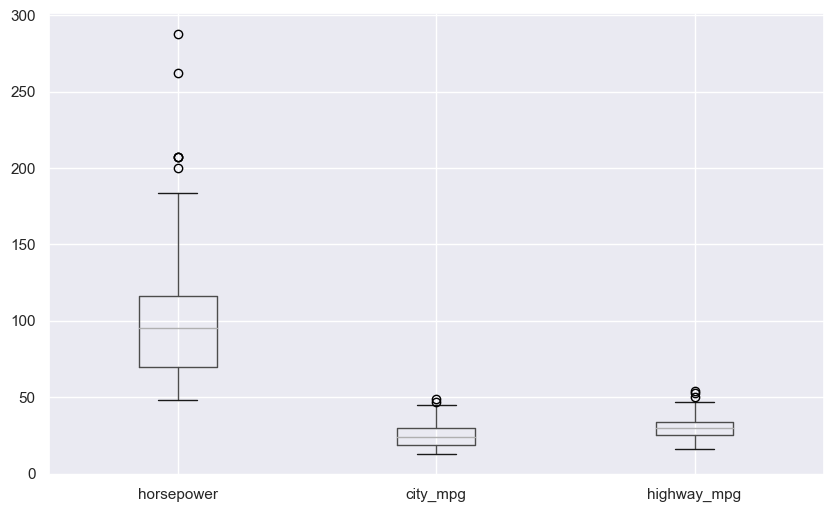

In [5]:
# Using matplotlib to plot the data and visualize the outliers
df2.boxplot(figsize=(10,6));

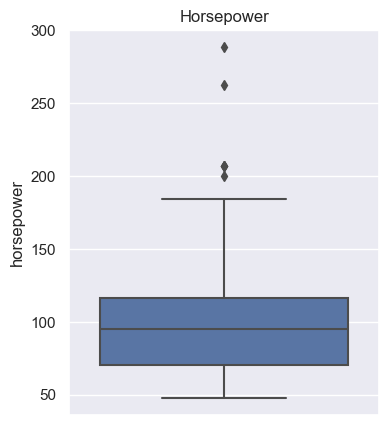

In [6]:
# Using seaborn to plot variable horsepower and visualize the outliers
sns.boxplot(y=df2.horsepower).set_title('Horsepower')
plt.show()	

`whis`: Proportion of the IQR past the low and high quartiles to extend the plot whiskers. Points outside this range will be identified as outliers.

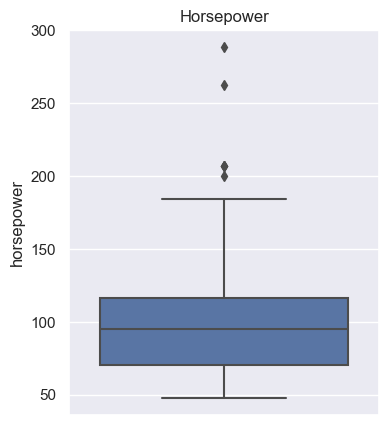

In [7]:
# whis=1.5 produces the same result. It is the default value.
sns.boxplot(y=df2.horsepower, whis=1.5).set_title('Horsepower')
plt.show()

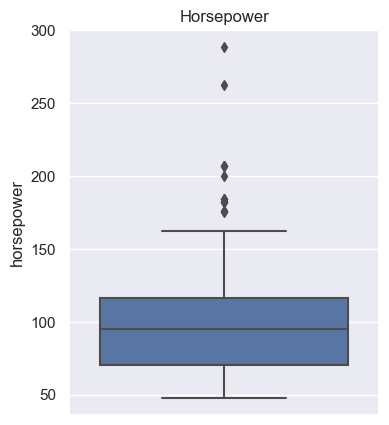

In [8]:
# with whis=1 you get more outliers
sns.boxplot(y=df2.horsepower, whis=1).set_title('Horsepower')
plt.show()

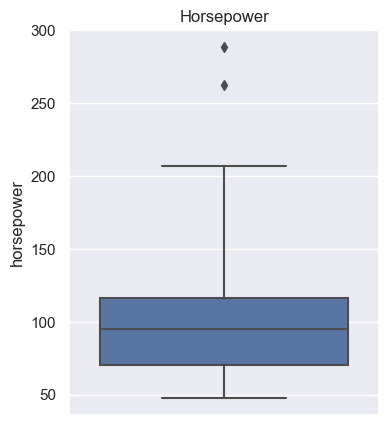

In [9]:
# with whis=2 you get less outliers
sns.boxplot(y=df2.horsepower, whis=2).set_title('Horsepower')
plt.show()

With `whis=0` you get no whisker, only the box. All data outside the box are considered outliers.


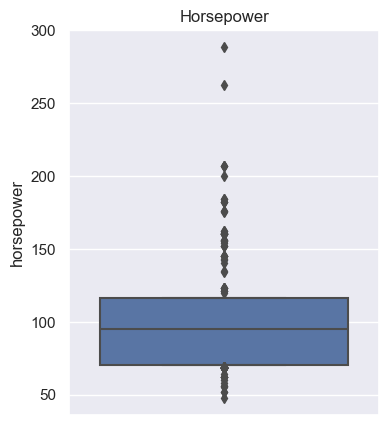

In [10]:
# with whis=2 you get less outliers
sns.boxplot(y=df2.horsepower, whis=0).set_title('Horsepower')
plt.show()

Let's create a function that shows the boxplot, given a whisker value, and returns the outliers.

In [11]:
def boxplot_outliers(data, whis=1.5):
    '''
    Show the Boxplot and return the outliers
    '''
    fig = sns.boxplot(y=data, whis=whis)    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1-whis*IQR) | (data > Q3+whis*IQR)]    
    return fig, outliers

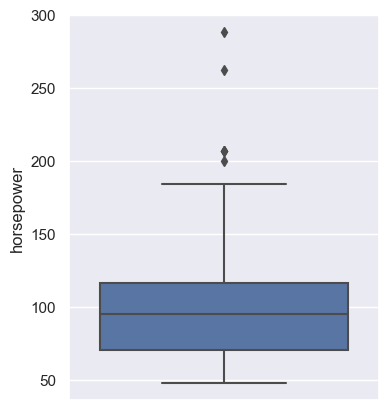

Outliers =  [262. 200. 207. 207. 207. 288.]


In [12]:
fig, outliers = boxplot_outliers(df2.horsepower)
plt.show()
print('Outliers = ', outliers.values)

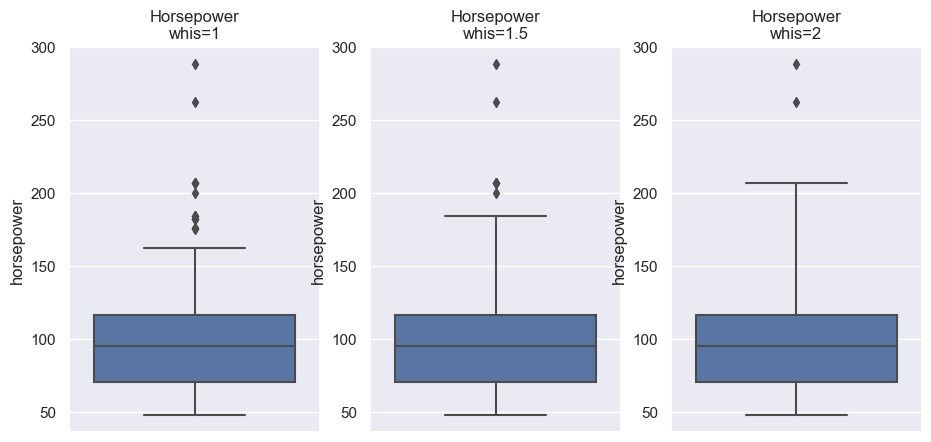

In [13]:
plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
fig_h1, out_h1 = boxplot_outliers(df2.horsepower, whis=1)
plt.title('Horsepower\nwhis=1')

plt.subplot(1,3,2)
fig_h2, out_h2 = boxplot_outliers(df2.horsepower, whis=1.5)
plt.title('Horsepower\nwhis=1.5')

plt.subplot(1,3,3)
fig_h3, out_h3 = boxplot_outliers(df2.horsepower, whis=2)
plt.title('Horsepower\nwhis=2')

plt.show()

Variables `out_h1`, `out_h2`, and `out_h3` have the corresponding outliers.

In [14]:
print('Outliers - whis=1:  ', out_h1.values)
print('Outliers - whis=1.5:', out_h2.values)
print('Outliers - whis=2:  ', out_h3.values)

Outliers - whis=1:   [182. 182. 182. 176. 176. 262. 184. 184. 175. 200. 207. 207. 207. 288.]
Outliers - whis=1.5: [262. 200. 207. 207. 207. 288.]
Outliers - whis=2:   [262. 288.]


### Analyzing outliers of `city_mpg`

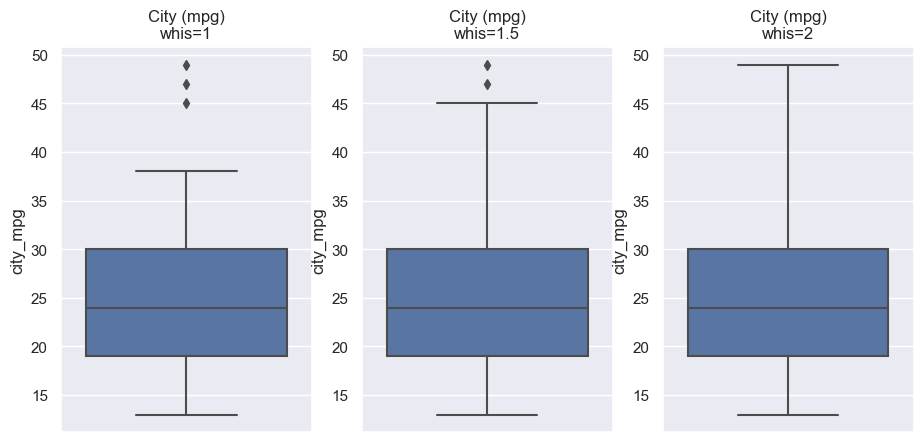

In [15]:
plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
fig_c1, out_c1 = boxplot_outliers(df2.city_mpg, whis=1)
plt.title('City (mpg)\nwhis=1')

plt.subplot(1,3,2)
fig_c2, out_c2 = boxplot_outliers(df2.city_mpg, whis=1.5)
plt.title('City (mpg)\nwhis=1.5')

plt.subplot(1,3,3)
fig_c3, out_c3 = boxplot_outliers(df2.city_mpg, whis=2)
plt.title('City (mpg)\nwhis=2')

plt.show()

In [16]:
print('Outliers (city_mpg) - whis=1:  ', out_c1.values)
print('Outliers (city_mpg) - whis=1.5:', out_c2.values)
print('Outliers (city_mpg) - whis=2:  ', out_c3.values)

Outliers (city_mpg) - whis=1:   [47 49 45]
Outliers (city_mpg) - whis=1.5: [47 49]
Outliers (city_mpg) - whis=2:   []


### Analyzing outliers of `highway_mpg`

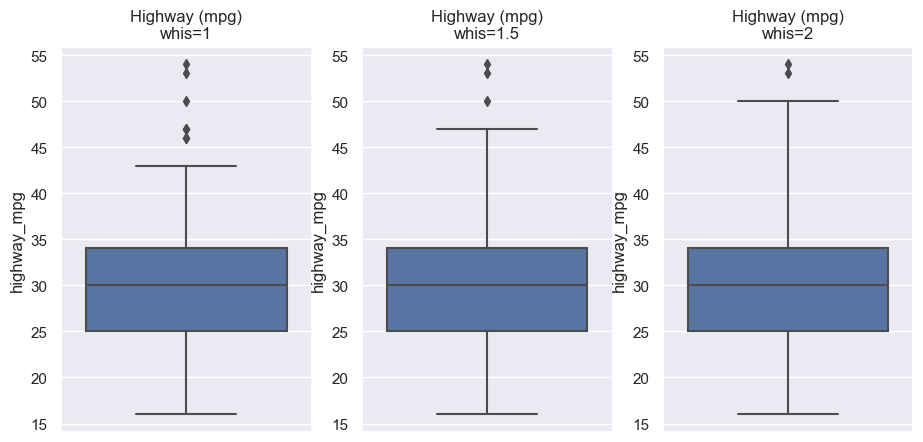

In [17]:
plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
fig_w1, out_w1 = boxplot_outliers(df2.highway_mpg, whis=1)
plt.title('Highway (mpg)\nwhis=1')

plt.subplot(1,3,2)
fig_w2, out_w2 = boxplot_outliers(df2.highway_mpg, whis=1.5)
plt.title('Highway (mpg)\nwhis=1.5')

plt.subplot(1,3,3)
fig_w3, out_w3 = boxplot_outliers(df2.highway_mpg, whis=2)
plt.title('Highway (mpg)\nwhis=2')

plt.show()

In [18]:
print('Outliers (city_mpg) - whis=1:  ', out_w1.values)
print('Outliers (city_mpg) - whis=1.5:', out_w2.values)
print('Outliers (city_mpg) - whis=2:  ', out_w3.values)

Outliers (city_mpg) - whis=1:   [53 54 50 47 47 46 46]
Outliers (city_mpg) - whis=1.5: [53 54 50]
Outliers (city_mpg) - whis=2:   [53 54]


## Boxenplots 

Boxenplots are advancements of boxplots designed to visualize distributions more accurately. Therefore, we can use them to detect outliers.

The number of boxes, and by extension number of percentiles, to draw. All methods are detailed in Wickham’s paper. Each makes different assumptions about the number of outliers and leverages different statistical properties. 

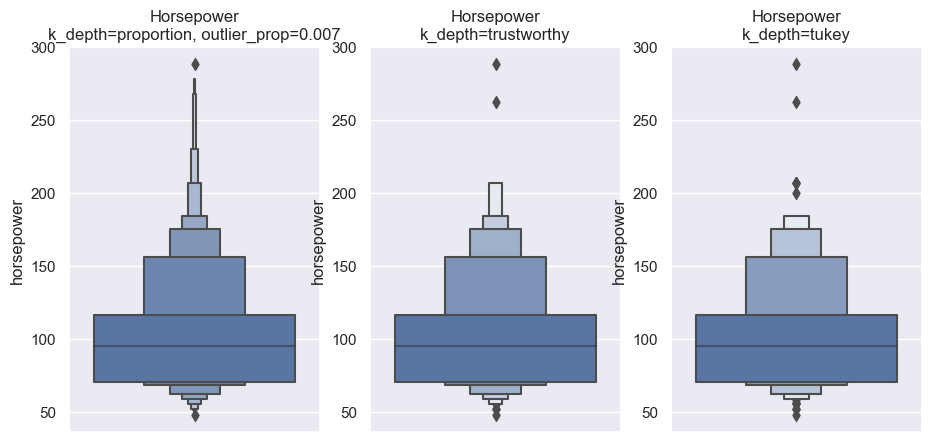

In [19]:
plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
sns.boxenplot(y=df2.horsepower, k_depth='proportion', outlier_prop=0.007)
plt.title('Horsepower\nk_depth=proportion, outlier_prop=0.007')

plt.subplot(1,3,2)
sns.boxenplot(y=df2.horsepower, k_depth='trustworthy')
plt.title('Horsepower\nk_depth=trustworthy')

plt.subplot(1,3,3)
sns.boxenplot(y=df2.horsepower, k_depth='tukey')
plt.title('Horsepower\nk_depth=tukey')

plt.show()

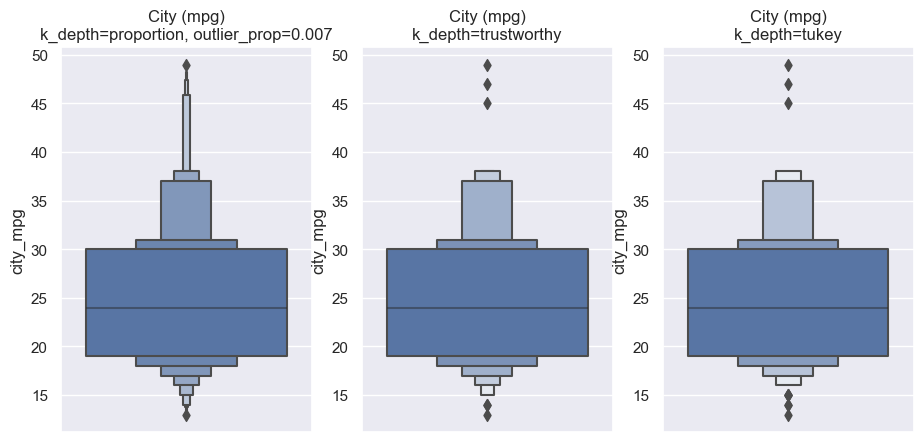

In [20]:
plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
sns.boxenplot(y=df2.city_mpg, k_depth='proportion', outlier_prop=0.007)
plt.title('City (mpg)\nk_depth=proportion, outlier_prop=0.007')

plt.subplot(1,3,2)
sns.boxenplot(y=df2.city_mpg, k_depth='trustworthy')
plt.title('City (mpg)\nk_depth=trustworthy')

plt.subplot(1,3,3)
sns.boxenplot(y=df2.city_mpg, k_depth='tukey')
plt.title('City (mpg)\nk_depth=tukey')

plt.show()

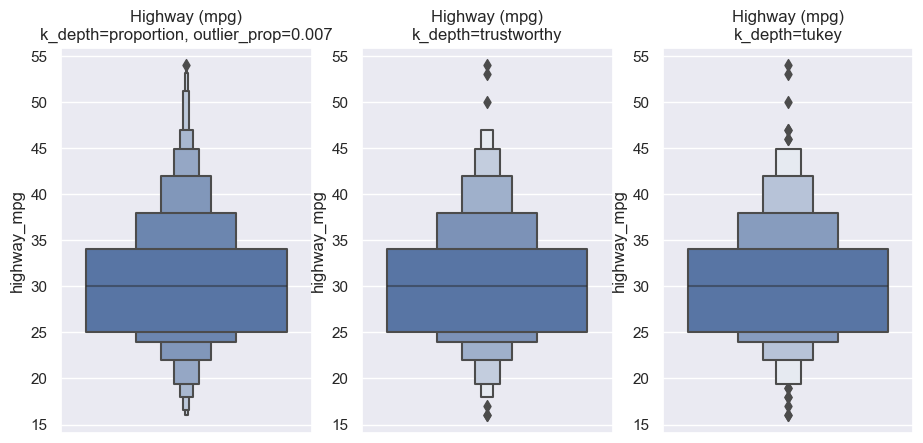

In [21]:
plt.figure(figsize=(11,5))

plt.subplot(1,3,1)
sns.boxenplot(y=df2.highway_mpg, k_depth='proportion', outlier_prop=0.007)
plt.title('Highway (mpg)\nk_depth=proportion, outlier_prop=0.007')

plt.subplot(1,3,2)
sns.boxenplot(y=df2.highway_mpg, k_depth='trustworthy')
plt.title('Highway (mpg)\nk_depth=trustworthy')

plt.subplot(1,3,3)
sns.boxenplot(y=df2.highway_mpg, k_depth='tukey')
plt.title('Highway (mpg)\nk_depth=tukey')

plt.show()

## Z-Score

Z-scores or standardized values, are another way to identify outliers. 

In [22]:
def z_score_outliers(x):
    """
    Calculate z-score for each element in x and return the outliers
    """
    mean_x = x.mean()
    std_x = x.std()
    z_scores = (x - mean_x) / std_x
    fig = sns.displot(z_scores, kde=True, height=3, aspect=1.5)
    plt.axvline(x=-3, ymin=0, ymax=0.5, color='orangered', linewidth=2)
    plt.axvline(x=3,  ymin=0, ymax=0.5, color='orangered', linewidth=2)
    z_outliers = z_scores[(z_scores < -3) | (z_scores > 3)]
    x_outliers = z_outliers * std_x + mean_x
    return fig, x_outliers

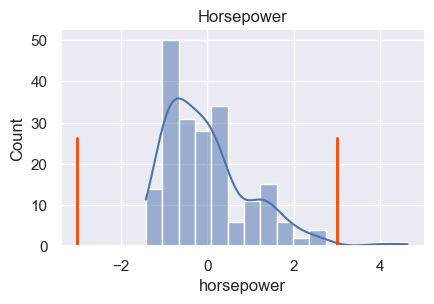

Outliers:  [262. 288.]


In [23]:
fig_h, out_h = z_score_outliers(df2.horsepower)
plt.title('Horsepower')
plt.show()
print('Outliers: ', out_h.values)

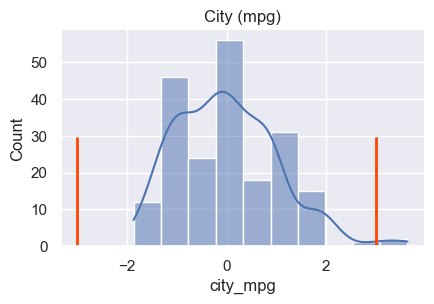

Outliers:  [47. 49. 45.]


In [24]:
fig_c, out_c = z_score_outliers(df2.city_mpg)
plt.title('City (mpg)')
plt.show()
print('Outliers: ', out_c.values)

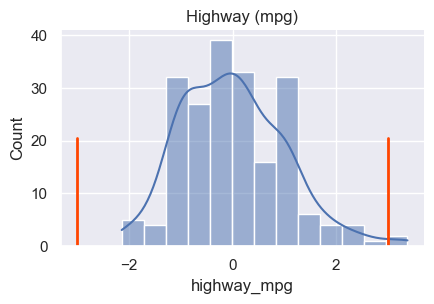

Outliers:  [53. 54.]


In [25]:
fig_w, out_w = z_score_outliers(df2.highway_mpg)
plt.title('Highway (mpg)')
plt.show()
print('Outliers: ', out_w.values)

## Scatter Plots

Scatter plots are graphs that can detect outliers in multivariate settings. 

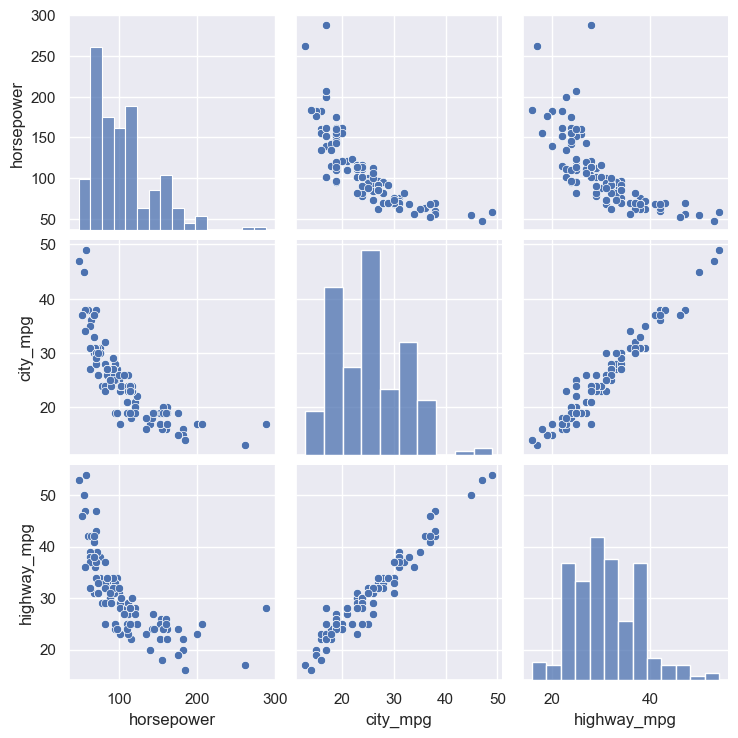

In [26]:
sns.pairplot(data=df2)
plt.show()

Detect outliers in scatterplots is not as easy as in a univariate method like boxplot or z-score. 

Let's focus on horsepower vs. city_mpg

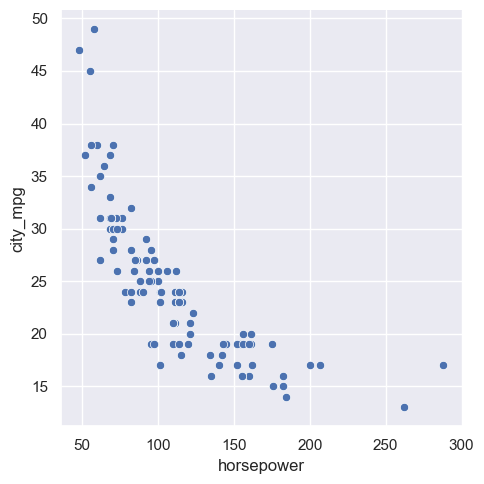

In [27]:
sns.relplot(x=df2.horsepower, y=df2.city_mpg)
plt.show()

It looks like the points in the right lower corner are outliers. Let's remove them.

In [28]:
# removing values with horsepower > 250
df3 = df2[df2.horsepower < 250] 

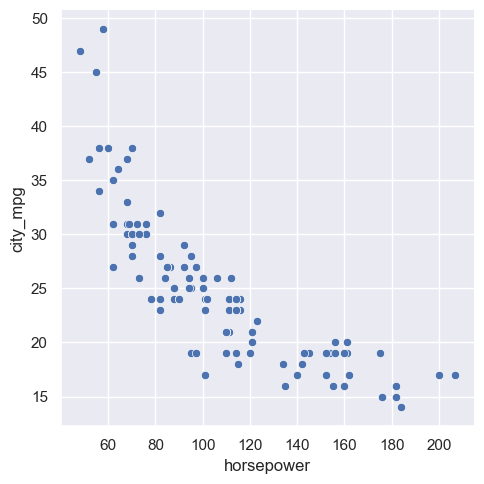

In [29]:
# After removing the possible outliers
sns.relplot(x=df3.horsepower, y=df3.city_mpg)
plt.show()

## References

- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc. chapter 3